## Assignment 4: Natural language processing

In this assignment, we'll practice reading PDF files, topic modeling, and sentiment analysis.

We'll use [this dataset of emailed comments](https://minneapolis2040.com/media/1411/minneapolis-2040-emailed-responses_062218.pdf) on the Minneapolis 2040 plan. Download the PDF to your computer. If you want some background, [check out the city's website](https://minneapolis2040.com/received-public-comments/).

(1) Open the PDF in Python using `PyPDF2`. Count the number of pages, and put the entire text into a string.

In [80]:
import PyPDF2
path = '/Users/adammb/Desktop/'  # replace with your path
fn = 'minneapolis-2040-emailed-responses_062218.pdf'

# your code here

n_pages = 999 # assign the number of pages to this variable
pdftext = ''  # string of the text

### BEGIN SOLUTION
path = '/Users/adammb/Desktop/'
pdffile = open(path+fn, 'rb')
pdf = PyPDF2.PdfFileReader(pdffile)
n_pages = pdf.getNumPages()

pdftext = ''
for page in pdf.pages:
    pdftext += page.extractText() 

pdffile.close()
### END SOLUTION

In [81]:
print(n_pages)
print('Text is {} characters long'.format(len(pdftext)))

assert n_pages == 199
assert len(pdftext) == 525184

199
Text is 525184 characters long


In [82]:
eirtext = re.sub(r"\s+", " ", eirtext)

NameError: name 'eirtext' is not defined

(2) If you take a look at the text, it seems that the different comments are separated by the `"\n Content"` string. 

Split your text into different comments using this separator. (This method isn't perfect, but it's a good first approximation.)

Note that since our splitting relies on the `\n` newline character, we need to split before cleaning up the whitespace.

In [ ]:
comment_list = []  # your list of comments

### BEGIN SOLUTION
comment_list = pdftext.split('\n Content')
### END SOLUTION


In [ ]:
print(len(comment_list))
assert len(comment_list) == 193

(3) Now, let's clean up each of these comments. 

Create a function that removes excess whitespace, punctuation, and stop words from a string. 

Also remove the following words that are in pretty much every comment: city, plan, Minneapolis, emailed, comments

Your function should take a string and return a cleaned-up string in the form of a list of words.

*Hint*: You'll first want to use regex to remove the excess whitespace and punctuation (and then whitespace again). Then create a list of words using `split()` and remove the stopwords. 

In [ ]:
def clean_string(text):
    # your code here
    return cleaned_list_of_words


### BEGIN SOLUTION
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['city', 'plan', 'minneapolis', 'emailed', 'comments']

def clean_string(text):
    # remove whitespace
    text = re.sub(r"\s+", " ", text)
    
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)

    # remove whitespace again
    text = re.sub(r"\s+", " ", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords]

    
    return cleaned_list_of_words

### END SOLUTION

In [83]:
newstr = clean_string('A    very dirty 934\t999 string for minneapolis  plan IS like  this')

print(newstr)
assert newstr == ['dirty', 'string', 'like']

['dirty', 'string', 'like']


(4) Now, use your function to clean up the list of comments. Return a new list of cleaned comments.

*Hint*: a list comprehension is the simplest way to do this. But you could also do a regular `for` loop over your `comment_list`.

In [84]:
cleaned_comment_list = []  # your code here

### BEGIN SOLUTION
cleaned_comment_list = [clean_string(cs) for cs in comment_list]

### END SOLUTION

In [85]:
print(cleaned_comment_list[9][:10])

assert cleaned_comment_list[9][:10] == ['writing', 'express', 'opposition', 'current', 'proposal',
 'fourplex', 'zoning', 'two', 'specific', 'concerns']

['writing', 'express', 'opposition', 'current', 'proposal', 'fourplex', 'zoning', 'two', 'specific', 'concerns']


(5) Estimate an LDA topic model on your cleaned comment list. You could use the same parameters for `num_topics`, `alpha` and `eta` as we did in class. The challenge problem asks you to go deeper and experiment with different values, but feel free to do so here.

Visualize your topic model using `pyLDAvis`.

In [86]:
### BEGIN SOLUTION

import gensim
dictionary = gensim.corpora.Dictionary(cleaned_comment_list)
corpus = [dictionary.doc2bow(wl) for wl in cleaned_comment_list]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.7, eta=0.5)


import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

### END SOLUTION

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.005585 -0.002614       1        1  50.373244
9     -0.003636  0.003504       2        1  19.025425
6      0.000441 -0.002171       3        1  11.549144
3     -0.000596  0.001036       4        1   4.213282
7      0.000670  0.000380       5        1   3.265446
1      0.004840  0.000023       6        1   2.952483
8      0.001208  0.000014       7        1   2.916479
4      0.001475  0.000272       8        1   2.227967
5     -0.000123  0.000338       9        1   2.047424
2      0.001304 -0.000782      10        1   1.429105, topic_info=              Term        Freq       Total Category  logprob  loglift
466        housing  455.000000  455.000000  Default  30.0000  30.0000
651        council  197.000000  197.000000  Default  29.0000  29.0000
61    neighborhood  163.000000  163.000000  Default  28.0000  28.0000
248     affordable  179.000000  179.000000  Default  27.0000  27.0000
364           time  159.000000  159.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
307           many    1.056631   90.908460  Topic10  -6.3647  -0.2066
234         public    1.068040   95.199514  Topic10  -6.3540  -0.2420
527          units    1.087069   99.736931  Topic10  -6.3363  -0.2709
84          single    1.017736   87.150693  Topic10  -6.4022  -0.2019
491  neighborhoods    1.104212  135.914998  Topic10  -6.3207  -0.5648

[838 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1482      1  0.481916          _
1482      2  0.240958          _
1482      3  0.120479          _
3281      1  0.320262  absolutes
3281      2  0.320262  absolutes
...     ...       ...        ...
417       6  0.027491     zoning
417       7  0.027491     zoning
417       8  0.013745     zoning
417       9  0.013745     zoning
417      10  0.013745     zoning

[2153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 7, 4, 8, 2, 9, 5, 6, 3])

(6) Now, it's time for some sentiment analysis!

Write a function that calculates the sentiment score (polarity) for each comment in your list. 

The function should take a list of words and return a score.

*Hint*: Remember the `join()` function!

In [68]:
def get_sentiment(list_of_words):
    # your code here
    return polarity

### BEGIN SOLUTION


from textblob import TextBlob
def get_sentiment(list_of_words):
    joined_list = ' '.join(list_of_words)
    polarity = TextBlob(joined_list).sentiment.polarity
    return polarity

### END SOLUTION

In [70]:
print(get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities']))
assert get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities'])==-0.275

-0.275


(7) Now, apply the sentiment score to every string in your list (`cleaned_comment_list`). Create a new list. 

*Hint*: another list comprehension might be in order.

In [71]:
sentiment_scores = []  # your list here

### BEGIN SOLUTION
sentiment_scores = [get_sentiment(cs) for cs in cleaned_comment_list]
### END SOLUTION

In [77]:
import numpy as np
print(np.round(sentiment_scores[9], 2))
assert np.round(sentiment_scores[9], 2)==0.06

0.06


(8) Finally, plot a histogram of your scores.

<AxesSubplot:ylabel='Count'>

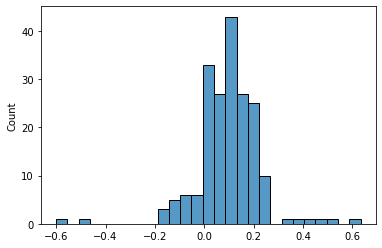

In [87]:


import seaborn as sns
sns.histplot(sentiment_scores)